In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt


from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head(5).T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [24]:
df.dtypes   #totalCharges it's view as "object" when it should be int64

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

<H4>Converting TotalCharges to int

In [3]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors ='coerce')        #coerce -> replace all nonnumeric values with NaN
df.TotalCharges = df.TotalCharges.fillna(0)

In [21]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                 int32
dtype: object

<H4> Making all spaces -> _ | and lowercase

In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [27]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


<H4> Changing the tarjget values from "yes" "no" to 1-0

In [5]:
df.churn = (df.churn == 'yes').astype(int)      #if its true and == yes -> 1 otherwise, 0

In [29]:
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int32

<h2> Training the model with train_test_split

In [6]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

# now spliting it in train and validation
df_train, df_val = train_test_split(df_train_full, test_size= 0.33, random_state= 11)

In [7]:
y_train = df_train.churn.values
y_val = df_val.churn.values

del df_train['churn']
del df_val['churn']

<h5> Last check of missing values

In [32]:
df_train_full.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [33]:
df_train_full.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

In [8]:
churn_rate = df_train_full.churn.mean()
round(churn_rate, 3)

0.27

In [57]:
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [9]:
categorical = [ 'gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']
numerical = ['tenure','monthlycharges', 'totalcharges']

In [10]:
df.totalcharges

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: totalcharges, Length: 7043, dtype: float64

In [14]:
df_train_full[categorical].nunique()    #being categorical, each columns has few options 

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

<h4>Feature Importance Analysis</h4> -> knowing how other variables affect the target variable

In [10]:
df[df.gender == 'female']['churn'].value_counts()

churn
0    2549
1     939
Name: count, dtype: int64

<h4> Observing gender values respecting churn

In [11]:
female_mean = df_train_full[df_train_full.gender == 'female'].churn.mean()
male_mean = df_train_full[df_train_full.gender == 'male'].churn.mean()

In [39]:
print('The female mean churn is: ', female_mean, '\nThe male mean churn is: ', male_mean, '\nAnd the global mean is: ', churn_rate)

The female mean churn is:  0.27682403433476394 
The male mean churn is:  0.2632135306553911 
And the global mean is:  0.26996805111821087


The difference between the male/female mean and the churn mean (global) it's not signifcant, meaning that knowing the gender wont be much of help predicting 
if the user is going to churn or not

<H4>Next is the partner variable

In [12]:
partner_yes = df_train_full[df_train_full.partner == 'yes'].churn.mean()
partner_no = df_train_full[df_train_full.partner == 'no'].churn.mean()

In [41]:
print('The churn rate for users with partners is: ', partner_yes, '\nThe churn rate for users without partners is: ', partner_no, '\nAnd the churn rate is: ', churn_rate )

The churn rate for users with partners is:  0.20503330866025166 
The churn rate for users without partners is:  0.3298090040927694 
And the churn rate is:  0.26996805111821087


In this case, we can see that the difference in the two rates is biggest, meaning that we can use the partner variable to predict.

<H4>Now with all the variables

In [13]:
global_mean = df_train_full.churn.mean()

df_group = df_train_full.groupby(by='gender').churn.agg(['mean'])
df_group['diff'] = df_group['mean'] - global_mean
df_group['risk'] = df_group['mean'] / global_mean

In [43]:
df_group

,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


In [15]:
for col in categorical:
    df_group = df_train_full.groupby(by=col).churn.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)

,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


,mean,diff,risk
seniorcitizen,,,
0,0.242270,-0.027698,0.897403
1,0.413377,0.143409,1.531208


,mean,diff,risk
partner,,,
no,0.329809,0.059841,1.221659
yes,0.205033,-0.064935,0.759472


,mean,diff,risk
dependents,,,
no,0.313760,0.043792,1.162212
yes,0.165666,-0.104302,0.613651


,mean,diff,risk
phoneservice,,,
no,0.241316,-0.028652,0.893870
yes,0.273049,0.003081,1.011412


,mean,diff,risk
multiplelines,,,
no,0.257407,-0.012561,0.953474
no_phone_service,0.241316,-0.028652,0.893870
yes,0.290742,0.020773,1.076948


,mean,diff,risk
internetservice,,,
dsl,0.192347,-0.077621,0.712482
fiber_optic,0.425171,0.155203,1.574895
no,0.077805,-0.192163,0.288201


,mean,diff,risk
onlinesecurity,,,
no,0.420921,0.150953,1.559152
no_internet_service,0.077805,-0.192163,0.288201
yes,0.153226,-0.116742,0.567570


,mean,diff,risk
onlinebackup,,,
no,0.404323,0.134355,1.497672
no_internet_service,0.077805,-0.192163,0.288201
yes,0.217232,-0.052736,0.804660


,mean,diff,risk
deviceprotection,,,
no,0.395875,0.125907,1.466379
no_internet_service,0.077805,-0.192163,0.288201
yes,0.230412,-0.039556,0.853480


,mean,diff,risk
techsupport,,,
no,0.418914,0.148946,1.551717
no_internet_service,0.077805,-0.192163,0.288201
yes,0.159926,-0.110042,0.592390


,mean,diff,risk
streamingtv,,,
no,0.342832,0.072864,1.269897
no_internet_service,0.077805,-0.192163,0.288201
yes,0.302723,0.032755,1.121328


,mean,diff,risk
streamingmovies,,,
no,0.338906,0.068938,1.255358
no_internet_service,0.077805,-0.192163,0.288201
yes,0.307273,0.037305,1.138182


,mean,diff,risk
contract,,,
month-to-month,0.431701,0.161733,1.599082
one_year,0.120573,-0.149395,0.446621
two_year,0.028274,-0.241694,0.104730


,mean,diff,risk
paperlessbilling,,,
no,0.172071,-0.097897,0.637375
yes,0.338151,0.068183,1.252560


,mean,diff,risk
paymentmethod,,,
bank_transfer_(automatic),0.168171,-0.101797,0.622928
credit_card_(automatic),0.164339,-0.105630,0.608733
electronic_check,0.455890,0.185922,1.688682
mailed_check,0.193870,-0.076098,0.718121


In [13]:
from sklearn.metrics import mutual_info_score

In [11]:
def calculate_mi(series):
    return mutual_info_score(series, df_train_full.churn)

In [14]:
df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923
deviceprotection,0.043453
paymentmethod,0.043210
streamingtv,0.031853
streamingmovies,0.031581
paperlessbilling,0.017589


<H4> Correlation</h4>
tiende a 1? -> si una variable sube, la otra tambien, si target es categorical, significa que habran mas 1's que 0's<br>
tiende a -1? -> lo contrario<br>
corr = 0? -> no hay relacion alguna, totalmente independientes

In [15]:
df_train_full[numerical].corrwith(df_train_full.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [20]:
df_train_full.contract.value_counts()

contract
month-to-month    3104
two_year          1344
one_year          1186
Name: count, dtype: int64

<h4>Vectorizer using DictVectorizer

In [16]:
#first we need the categorical in a dict

train_dict = df_train[categorical + numerical].to_dict(orient='records')

In [17]:
#each column from the df is the key in this dictionary
train_dict[0]

{'gender': 'male',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'dsl',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'bank_transfer_(automatic)',
 'tenure': 71,
 'monthlycharges': 86.1,
 'totalcharges': 6045.9}

In [27]:
#now we use DictVectorizer
from sklearn.feature_extraction import DictVectorizer

"""
-   The dv looks at the content of these dictionaries and figures out the possible values for each variable and how to map them.
-   If a feature is categorical, it applies the 'one-hot enconding'.
-   If a feature is numerical, it is left intact
-   sparse = False --> so it creates a simple NumPy array and the matrix will not be sparsed. 

"""

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [29]:
# After we fit the vectomizer, we can use it for converting the dict to a matrix using transform

X_train = dv.transform(train_dict)

In [32]:
#The only variables that are not 1's or 0's are the numerical features
X_train[0]

array([0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 8.6100e+01, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 7.1000e+01, 6.0459e+03])

In [34]:
#Here does not create a new column for the variables "monthly charge", "tenure" and "totalcharges" because they are numerical
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

<H3>Using Logistic Regression -> classification model</H3> <br>
The output of logistic regression is probability, the prob that the observation Xi is 1 (churn)

$g(x_i) = w_0 + x_i^T w$

We need to make sure that the prediction of the model always stay between zero and one -> Sigmoid

$g(x_i) = sigmoid(w0+X_i^Tw)$

<h4>Training the Model using SCIKIT Learn loggistic regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
#solver ->  liblinear: adecuado para problemas de clasificacion binaria y es eficiente en terminos de memoria. 
model = LogisticRegression(solver='liblinear',random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

<H4>Testing the model

In [38]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [39]:
y_pred = model.predict_proba(X_val)

In [42]:
#2 dim array, the first column contains the prob that the target is negative (no churn), the second, the prob that the target is positive (churn)
y_pred

array([[0.76509421, 0.23490579],
       [0.73114941, 0.26885059],
       [0.68055125, 0.31944875],
       ...,
       [0.94275141, 0.05724859],
       [0.38477235, 0.61522765],
       [0.93872699, 0.06127301]])

We dont need the two columns because if one is p, then the other is 1-p

In [43]:
y_pred = model.predict_proba(X_val)[:,1]

In [44]:
y_pred

array([0.23490579, 0.26885059, 0.31944875, ..., 0.05724859, 0.61522765,
       0.06127301])

Given that what we are looking for is to detect posible customers that may churn and send them emails with offers, we need solid predictions.<br>
So we need a threshold to which we can say "from here, we will take this customer as a possible churn" 

In [48]:
# taking a threshold of 0.5

churn = y_pred>=0.5
churn

array([False, False, False, ..., False,  True, False])

having this "hard" predictions, now we need to evaluate the queality of these predictions
<h4>Accuracy

In [ ]:
#se entrena con X_val asi que sus targets son y_val, por eso corresponden y se pueden comparar. 

In [50]:
#here we test whats the porcentage of the true values that are actually true
#even these variables have different type elements (int 1-0 vs True-False) the == comparator transforms bools to 1-0
(y_val == churn).mean()

0.8016129032258065

In [52]:
#bias -> model.intercept_[0]
#the rest of the weights -> model.coef_[0]
#to see which feature is associated with each weight, we can use get_feature_names

dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.563,
 'contract=one_year': -0.086,
 'contract=two_year': -0.599,
 'dependents=no': -0.03,
 'dependents=yes': -0.092,
 'deviceprotection=no': 0.1,
 'deviceprotection=no_internet_service': -0.116,
 'deviceprotection=yes': -0.106,
 'gender=female': -0.027,
 'gender=male': -0.095,
 'internetservice=dsl': -0.323,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.116,
 'monthlycharges': 0.001,
 'multiplelines=no': -0.168,
 'multiplelines=no_phone_service': 0.127,
 'multiplelines=yes': -0.081,
 'onlinebackup=no': 0.136,
 'onlinebackup=no_internet_service': -0.116,
 'onlinebackup=yes': -0.142,
 'onlinesecurity=no': 0.258,
 'onlinesecurity=no_internet_service': -0.116,
 'onlinesecurity=yes': -0.264,
 'paperlessbilling=no': -0.213,
 'paperlessbilling=yes': 0.091,
 'partner=no': -0.048,
 'partner=yes': -0.074,
 'paymentmethod=bank_transfer_(automatic)': -0.027,
 'paymentmethod=credit_card_(automatic)': -0.136,
 'paymentmethod=electronic_check': 0.175,


Trying a simpler smaller model 

In [53]:
small_subset = ['contract','tenure', 'totalcharges']
train_dict_small = df_train[small_subset].to_dict(orient='records')
dv_small = DictVectorizer(sparse=False)
dv_small.fit(train_dict_small)

X_small_train = dv_small.transform(train_dict_small)

In [54]:
model_small = LogisticRegression(solver='liblinear', random_state=1)
model_small.fit(X_small_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [55]:
#Bias, the baseline prediction, the one we would make without knowing anything else about the observation
# being -0.57 mean that the client are more likely to not churn
model_small.intercept_[0]

-0.5772299084462216

In [56]:
#
dict(zip(dv_small.get_feature_names_out(),model_small.coef_[0].round(3)))

{'contract=month-to-month': 0.866,
 'contract=one_year': -0.327,
 'contract=two_year': -1.117,
 'tenure': -0.094,
 'totalcharges': 0.001}

<h4>Trying the model

In [57]:
customer = {
    'customerid':'83844-dfsdf',
    'gender': 'female',
    'seniorcitizen':0,
    'partner':'no',
    'dependents':'no',
    'tenure': 41,
    'phoneservice':'yes',
    'multiplelines':'no',
    'internetservice':'dsl',
    'onlinesecurity': 'yes',
    'onlinebackup': 'no',
    'deviceprotection': 'yes',
    'techsupport': 'yes',
    'streamingtv': 'yes',
    'streamingmovies': 'yes',
    'contract': 'one_year',
    'paperlessbilling':'yes',
    'paymentmethod':'bank_transfer_(automatic)',
    'monthlycharges':  79.85,
    'totalcharges': 3320.75    
}

In [58]:
X_test = dv.transform([customer])

In [59]:
X_test

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 7.98500e+01, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 4.10000e+01, 3.32075e+03]])

In [60]:
model.predict_proba(X_test)

array([[0.92667376, 0.07332624]])

In [61]:
model.predict_proba(X_test)[0,1]    #first row, second column
#probability of the client tu churn. not likely

0.07332623830781355

Another 

In [74]:
customer_2 = {
    'customerid':'83844-dfsdf',
    'gender': 'female',
    'seniorcitizen':0,
    'partner':'yes',
    'dependents':'yes',
    'tenure': 10,
    'phoneservice':'no',
    'multiplelines':'no',
    'internetservice':'dsl',
    'onlinesecurity': 'no',
    'onlinebackup': 'no',
    'deviceprotection': 'no',
    'techsupport': 'no',
    'streamingtv': 'no',
    'streamingmovies': 'no',
    'contract': 'month-to-month',
    'paperlessbilling':'yes',
    'paymentmethod':'electronic_check',
    'monthlycharges':  400,
    'totalcharges': 500    
}

In [75]:
X_test_2 = dv.transform([customer_2])
model.predict_proba(X_test_2)

array([[0.38236796, 0.61763204]])

<h4> Confussion box

In [ ]:
t = 0.5         #threshhold at 0.5
predict_churn = (y_pred >=t)
predict_no_churn = (y_pred<t)

actual_churn = (y_val == 1)
actual_no_churn = (y_val == 0)

true_positive = (predict_churn & actual_churn).sum()
false_positive = (predict_churn & actual_no_churn).sum()

true_negative = (predict_no_churn & actual_no_churn).sum()
false_negative = (predict_no_churn & actual_churn).sum()

In [ ]:
print(f'TN: {true_negative}, FN: {false_negative}, TP: {true_positive}, FP: {false_positive}')

TN: 1202, FN: 197, TP: 289, FP: 172


In [ ]:
confusion_table = np.array(
    [[true_negative, false_positive],
     [false_negative, true_positive]]
)
confusion_table

array([[1202,  172],
       [ 197,  289]])

In [ ]:
confusion_table / confusion_table.sum()

<H4>ROC Curve

In [ ]:
#testing more thresholds 

scores = []

thresholds = np.linspace(0,1,101)

for t in thresholds:
    tp = ((y_pred >= t) & (y_val == 1)).sum()
    fp = ((y_pred >= t) & (y_val == 0)).sum()
    fn = ((y_pred < t) & (y_val == 1)).sum()
    tn = ((y_pred < t) & (y_val == 0)).sum()
    scores.append((t,tp,fp,fn, tn))

In [ ]:
#scores to dataframe

df_scores = pd.DataFrame(scores)
df_scores.columns = ['threshold', 'tp','fp','fn','tn']


In [ ]:
#creating the TP rates and FN rates


df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

<function matplotlib.pyplot.legend(*args, **kwargs)>

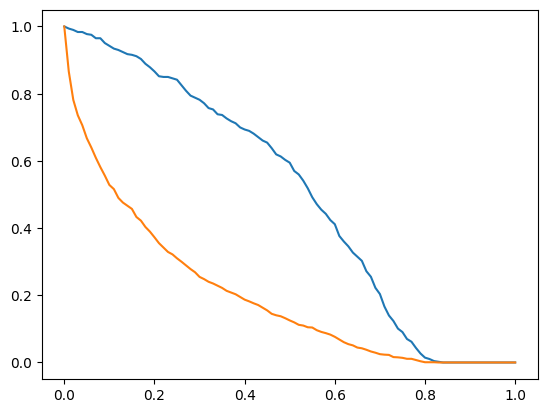

In [ ]:
#plotting 

plt.plot(df_scores.threshold, df_scores.tpr, label= 'TPR')
plt.plot(df_scores.threshold, df_scores.fpr, label = 'FPR')
plt.legend

In [ ]:
def tpr_fpr_datafrfame(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0,1,101)

    for t in thresholds:
        tp = ((y_pred >= t) & (y_val == 1)).sum()
        fp = ((y_pred >= t) & (y_val == 0)).sum()
        fn = ((y_pred < t) & (y_val == 1)).sum()
        tn = ((y_pred < t) & (y_val == 0)).sum()
        scores.append((t,tp,fp,fn, tn))

    df_scores = pd.DataFrame(scores)
    df_scores.columns = ['threshold', 'tp','fp','fn','tn']

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    return df_scores

In [ ]:
#Creating random predictions to test
np.random.seed(1)
y_rand = np.random.uniform(0,1,size=len(y_val))
df_rand = tpr_fpr_datafrfame(y_val, y_rand)

In [ ]:
#Creating an ideal set of predictions
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()

y_ideal = np.repeat([0,1], [num_neg, num_pos])
y_pred_ideal = np.linspace(0,1,num_neg + num_pos)

df_ideal = tpr_fpr_datafrfame(y_ideal, y_pred_ideal)


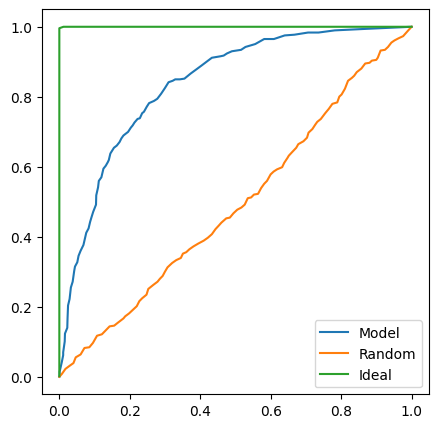

In [ ]:
#Plotting the ROC Curve

plt.figure(figsize=(5,5))

plt.plot(df_scores.fpr, df_scores.tpr, label='Model')
plt.plot(df_rand.fpr, df_rand.tpr, label='Random')
plt.plot(df_ideal.fpr, df_ideal.tpr, label='Ideal')

plt.legend()

#We want our model as closest to the ideal and as far as possible from the random curve

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


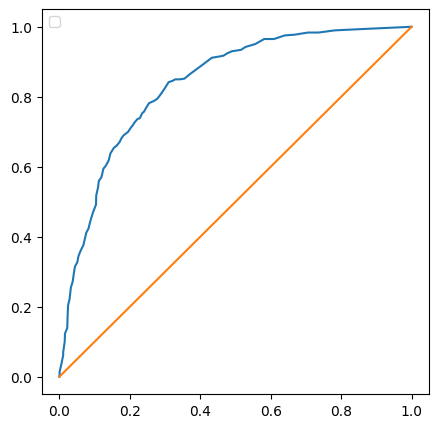

In [ ]:
#Plotting the ROC Curve

plt.figure(figsize=(5,5))
plt.plot(df_scores.fpr, df_scores.tpr)
plt.plot([0,1], [0,1])
plt.legend()

<h4>K-Fold Cross Validation

In [1]:
def train(df,y):
    cat = df[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(cat)

    X = dv.transform(cat)

    model = LogisticRegression(solver='liblinear')
    model.fit(X,y)

    return dv, model

In [2]:
def predict(df, dv, model):
    cat = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(cat)
    y_pred = model.predict_proba(X)[:,1]

    return y_pred


In [3]:
from sklearn.model_selection import KFold

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

aucs = []

for train_idx, val_idx in kfold.split(df_train_full):
    df_train = df_train_full.iloc[train_idx]
    df_val = df_train_full.iloc[val_idx]

    y_train = df_train.churn.values
    y_val = df_val.churn.values

    df, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    aucs.append(auc)